0.6044921875
0.6044921875
0.6044921875
0.7802734375
1.0439453125
1.2294921875
1.5029296875
1.4345703125
0.9951171875
0.8486328125
0.7802734375
0.7021484375


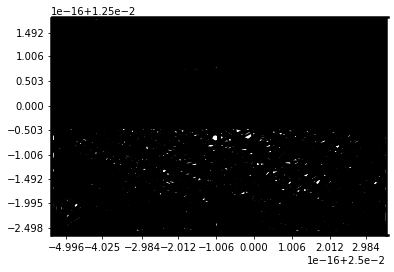

In [1]:
'''
TP 17/09/2023

Generate all the JPDF data each 1 month with 1 JPDF for exemple in mar

'''

%matplotlib inline

from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy
from datetime import date, timedelta, datetime 
import netCDF4
import scipy.stats as st
import matplotlib as mpl
import matplotlib.colors as colors
import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt
import sys
from Tools_jpdf import*
import matplotlib.patches as mpatches


    
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

def add_contour_per_wc(H_sum_tot,proba_list,c):
    
    n = 0

    level = np.zeros(len(proba_list))
    p = np.zeros(len(proba_list))

    
    H_sum_tot_neg = abs(np.where(H_sum_tot < 0, H_sum_tot,0))
    H_sum_tot_pos = abs(np.where(H_sum_tot > 0, H_sum_tot,0))


    for proba in proba_list:


        i = dichotomie(f,-10,10,0.001,proba,H_sum_tot_neg)
        print(i)

        H_tot = np.sum(H_sum_tot_neg)

        H_filter = np.where(H_sum_tot_neg > 10**i, H_sum_tot_neg,0)
        p[n] = np.sum(H_filter)*100/H_tot

        level[n] = 10**i
        n=n+1

    fmt = {}
    for l, s in zip(level, p):
        #fmt[l] = str(round(s,1))+'%'
        fmt[l] = ''
    
    CS = plt.contour(xedges[1:],yedges[1:],H_sum_tot_neg,level,linewidths=2,alpha=0.8,colors=c)
    ax.clabel(CS,level, inline=1, fontsize=16,fmt = fmt)

    return level

def compute_fraction(H,H_wc):
        
    H_wc_neg = np.where(H_wc<0,H_wc,0)

    xx, yy = np.meshgrid(xedges[1:], yedges[1:])
    #H_80 £*= np.where(H < 10**x_80, H,0)
    H_f = np.where(xx > 0.5, H,0)
    H_f = np.where(yy > xx, H_f,0)
    
    H_f_wc = np.where(xx > 0.5, H_wc,0)
    H_f_wc = np.where(yy > xx, H_f_wc,0)

    H_f_per = np.sum(H_f)*100/np.sum(H)
    H_f_wc_per = np.sum(H_f_wc)*100/np.sum(H_wc_neg)
    
    return(H_f_per,H_f_wc_per,np.sum(H_f_wc))


level_month = []
list_proba = [99.99]
list_month = ['jan','feb', 'mar', 'apr', 'may', 'jun','jul','aug','sep','oct','nov','dec']

for month in list_month:
    
    nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_filtred_domain/JPDF_{0}_mld.nc'.format(month),'r')
    H = np.asfortranarray(nc.variables['H_jpdf'])[:,:,:,:]
    H_wc = np.asfortranarray(nc.variables['H_wc'])[:,:,:,:]
    gap_list = np.asfortranarray(nc.variables['gap_list'])[:]
    nc.close()
    
    H_sum = np.nansum(H[:,:,0,:],axis=2)
    H_sum_norm = H_sum/np.sum(H_sum)

    level,fmt = add_contour_per(H_sum,list_proba,c='k')
    
    level_month.append(level)


# Monthly JPDF

0.6044921875


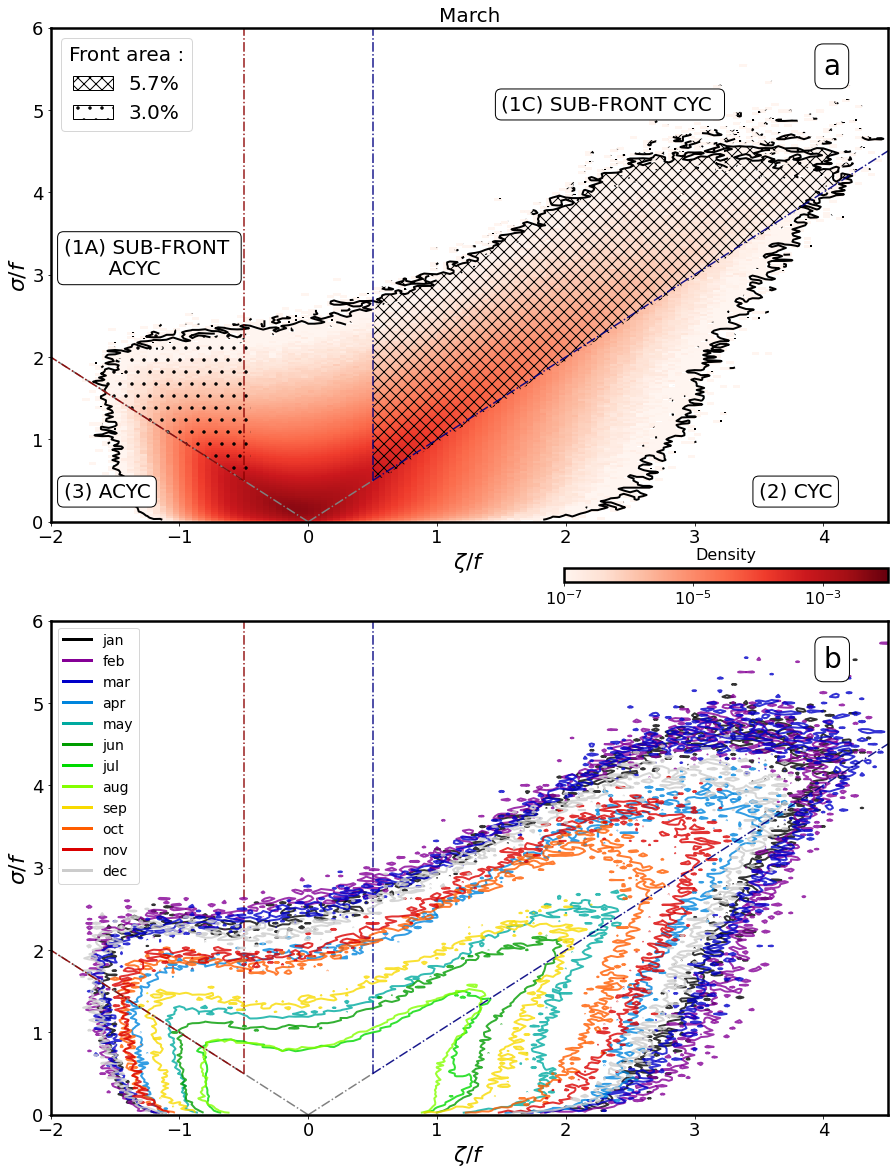

In [4]:
# TO EDIT 

fig = plt.figure(figsize=(15,20))
cbaxes = fig.add_axes([0.6, 0.495, 0.3, 0.01]) 

ax = fig.add_subplot(2,1,1)
#cbaxes = fig.add_axes([0.3, 0.85, 0.3, 0.01]) 
dir_save = '/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_figures/'
#dir_save = 'figure/'
month = 'mar'


# JPDF data 

nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_filtred_domain/JPDF_{0}_mld.nc'.format(month),'r')
H = np.asfortranarray(nc.variables['H_jpdf'])[:,:,:,:]
H_wc = np.asfortranarray(nc.variables['H_wc'])[:,:,:,:]
gap_list = np.asfortranarray(nc.variables['gap_list'])[:]
nc.close()

#xx, yy = np.meshgrid(xedges[1:], yedges[1:])

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)
xx, yy = np.meshgrid(xedges[1:], yedges[1:])



plt.title("March",size=20)

list_proba = [99.99]

H_sum = np.nansum(H[:,:,0,:],axis=2)

level,fmt = add_contour_per(H_sum,list_proba,c='k')

H_sum = np.where(H_sum < level,0,H_sum)

H_sum_norm = H_sum/np.sum(H_sum)
#H_wc_sum = H_wc[:,:,i,0]

#ax = fig.add_subplot(1,1,1)
#plt.title(gap_list[i],size=20)

xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)


cf = plt.pcolormesh(xedges[:],yedges[:],H_sum_norm,norm=colors.LogNorm(vmin=1e-7, vmax=1e-2),cmap=plt.cm.Reds)

#cbaxes = fig.add_axes([0.3, 0.85, 0.3, 0.01])
cb = plt.colorbar(cf,ax = ax, cax = cbaxes,orientation="horizontal")  
cb.set_label('Density', fontsize=16,labelpad=-60)
cb.ax.tick_params(labelsize=16)

CS = plt.contour(xedges[1:],yedges[1:],H_sum,level,linewidths=2,alpha=1,colors='k',linestyles='-')

plt.clabel(CS,level, inline=1, fontsize=18,fmt = fmt)

### LES AJOUTS ####

x = np.linspace(0, 6, 100)
x = np.linspace(0, 6, 100)
x1 = np.linspace(0, 0.5, 100)
plt.plot(x1,x1,linestyle='-.',color='grey')
plt.plot(-x,x,linestyle='-.',color='grey')
plt.vlines(0.5,0.5,6,linestyle='-.',color='navy',alpha=0.9)
x_sub = np.linspace(0.5, 6, 100)
plt.plot(x_sub,x_sub,linestyle='-.',color='navy',alpha=0.9)

plt.vlines(-0.5,0.5,6,linestyle='-.',color='darkred',alpha=0.9)
x_sub = np.linspace(0.5, 6, 100)
plt.plot(-x_sub,x_sub,linestyle='-.',color='darkred',alpha=0.9)

plt.xlabel(r'$\zeta/f$',fontsize=22); plt.ylabel(r'$\sigma/f$',fontsize=22)
plt.xlim(-2,4.5)
plt.ylim(0,6)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

H_f = np.where(xx > 0.5, H_sum,0)
H_f = np.where(yy > xx, H_f,0)
plt.contourf(xedges[1:],yedges[1:],H_f,[level[0],1e10],colors='none',hatches=['xx'],extend='lower')

H_f_ac = np.where(xx < -0.5, H_sum,0)
H_f_ac = np.where(yy > -xx, H_f_ac,0)
plt.contourf(xedges[1:],yedges[1:],H_f_ac,[level[0],1e10],colors='none',hatches=['.'],extend='lower')


Hf_per = mpatches.Patch(hatch='xx', label=str(np.round(np.nansum(H_f)*100/np.nansum(H_sum),decimals=1))+'%',fill=False)
Hf_ac_per = mpatches.Patch(hatch='.', label=str(np.round(np.nansum(H_f_ac)*100/np.nansum(H_sum),decimals=1))+'%',fill=False)
plt.legend(handles=[Hf_per,Hf_ac_per],loc=2, prop={'size': 20}, title = "Front area :", title_fontsize = 20)


props = dict(boxstyle='round', facecolor='white', alpha=1,edgecolor='black')


#plt.text(-0.3,3,'(1) FRONT',size = 20,bbox=props)
plt.text(1.5,5,'(1C) SUB-FRONT CYC ' ,size = 20,color='k',bbox=props)
plt.text(-1.9,3,'(1A) SUB-FRONT \n       ACYC ' ,size = 20,color='k',bbox=props)
plt.text(3.5,0.3,'(2) CYC',size = 20,bbox=props)
plt.text(-1.9,0.3,'(3) ACYC',size = 20,bbox=props)

props = dict(boxstyle='round', facecolor='white', alpha=1)
textstr = 'a'
plt.text(4, 5.7, textstr, fontsize=28,
verticalalignment='top', bbox=props,ha='left', va='top')


ax = fig.add_subplot(2,1,2)

list_month = ['jan','feb', 'mar', 'apr', 'may', 'jun','jul','aug','sep','oct','nov','dec']
#list_month = ['feb']

### LES AJOUTS ####


x = np.linspace(0, 6, 100)
x = np.linspace(0, 6, 100)
x1 = np.linspace(0, 0.5, 100)
plt.plot(x1,x1,linestyle='-.',color='grey')
plt.plot(-x,x,linestyle='-.',color='grey')
plt.vlines(0.5,0.5,6,linestyle='-.',color='navy',alpha=0.9)
x_sub = np.linspace(0.5, 6, 100)
plt.plot(x_sub,x_sub,linestyle='-.',color='navy',alpha=0.9)

plt.vlines(-0.5,0.5,6,linestyle='-.',color='darkred',alpha=0.9)
x_sub = np.linspace(0.5, 6, 100)
plt.plot(-x_sub,x_sub,linestyle='-.',color='darkred',alpha=0.9)

plt.xlabel(r'$\zeta/f$',fontsize=22); plt.ylabel(r'$\sigma/f$',fontsize=22)
plt.xlim(-2,4.5)
plt.ylim(0,6)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# JPDF data 
list_proba = [99.99]
#list_proba = [99.9]

#c_map = plt.cm.get_cmap('hsv') # select the desired cmap
cmap_month = plt.cm.nipy_spectral
#colorlist = [cmap_month(i) for i in np.linspace(0., 1., 12)] 
#c_map = plt.cm.get_cmap('twilight') # select the desired cmap

arr=np.linspace(0,1,12) #create a list with numbers from 0 to 1 with n items
colorlist=list()
for c in arr:
    rgba=cmap_month(c) #select the rgba value of the cmap at point c which is a number between 0 to 1
    clr=colors.rgb2hex(rgba) #convert to hex
    colorlist.append(str(clr)) # create a list of these colors
i=0

hd = []

for month in list_month[:]:

#for month in list_month:
    
    nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_filtred_domain/JPDF_{0}_mld.nc'.format(month),'r')
    H = np.asfortranarray(nc.variables['H_jpdf'])[:,:,0,:]
    #H_wc = np.asfortranarray(nc.variables['H_wc'])[:,:,:,:]
    #gap_list = np.asfortranarray(nc.variables['gap_list'])[:]
    nc.close()
    
    H_sum = np.nansum(H[:,:,:],axis=2)
    H_sum_norm = H_sum/np.sum(H_sum)

    #level,fmt = add_contour_per(H_sum,list_proba,c='k')

    CS = plt.contour(xedges[1:],yedges[1:],H_sum,level_month[i],linewidths=2,alpha=0.8,colors=colorlist[i],linestyles='-')
    
    plt.plot([-3],[-3],linestyle='-',label=month,linewidth=3,color=colorlist[i])
    #hd.append(mpatches.Patch(linestyle='-',color=colorlist[i],label=month,fill=False))

    i=i+1

props = dict(boxstyle='round', facecolor='white', alpha=1)
textstr = 'b'
plt.text(4, 5.7, textstr, fontsize=28,
verticalalignment='top', bbox=props,ha='left', va='top')

plt.legend(prop={'size': 14},loc=2)

#plt.savefig(dir_save+'jpdf_season.png',dpi=200,bbox_inches='tight')


In [4]:
def add_contour_per_wc(H_sum_tot,proba_list,c):
    
    n = 0

    level = np.zeros(len(proba_list))
    p = np.zeros(len(proba_list))

    
    H_sum_tot_neg = abs(np.where(H_sum_tot < 0, H_sum_tot,0))
    H_sum_tot_pos = abs(np.where(H_sum_tot > 0, H_sum_tot,0))


    for proba in proba_list:


        i = dichotomie(f,-10,10,0.001,proba,H_sum_tot_neg)
        print(i)

        H_tot = np.sum(H_sum_tot_neg)

        H_filter = np.where(H_sum_tot_neg > 10**i, H_sum_tot_neg,0)
        p[n] = np.sum(H_filter)*100/H_tot

        level[n] = 10**i
        n=n+1

    fmt = {}
    for l, s in zip(level, p):
        #fmt[l] = str(round(s,1))+'%'
        fmt[l] = ''
    
    CS = plt.contour(xedges[1:],yedges[1:],H_sum_tot_neg,level,linewidths=2,alpha=0.8,colors=c)
    ax.clabel(CS,level, inline=1, fontsize=16,fmt = fmt)

    return level

def compute_fraction(H,H_wc):
        
    H_wc_neg = np.where(H_wc<0,H_wc,0)

    xx, yy = np.meshgrid(xedges[1:], yedges[1:])
    #H_80 £*= np.where(H < 10**x_80, H,0)
    H_f = np.where(xx > 0.5, H,0)
    H_f = np.where(yy > xx, H_f,0)
    
    H_f_wc = np.where(xx > 0.5, H_wc,0)
    H_f_wc = np.where(yy > xx, H_f_wc,0)

    H_f_per = np.sum(H_f)*100/np.sum(H)
    H_f_wc_per = np.sum(H_f_wc)*100/np.sum(H_wc_neg)
    
    return(H_f_per,H_f_wc_per,np.sum(H_f_wc))



# Monthly JPDF w

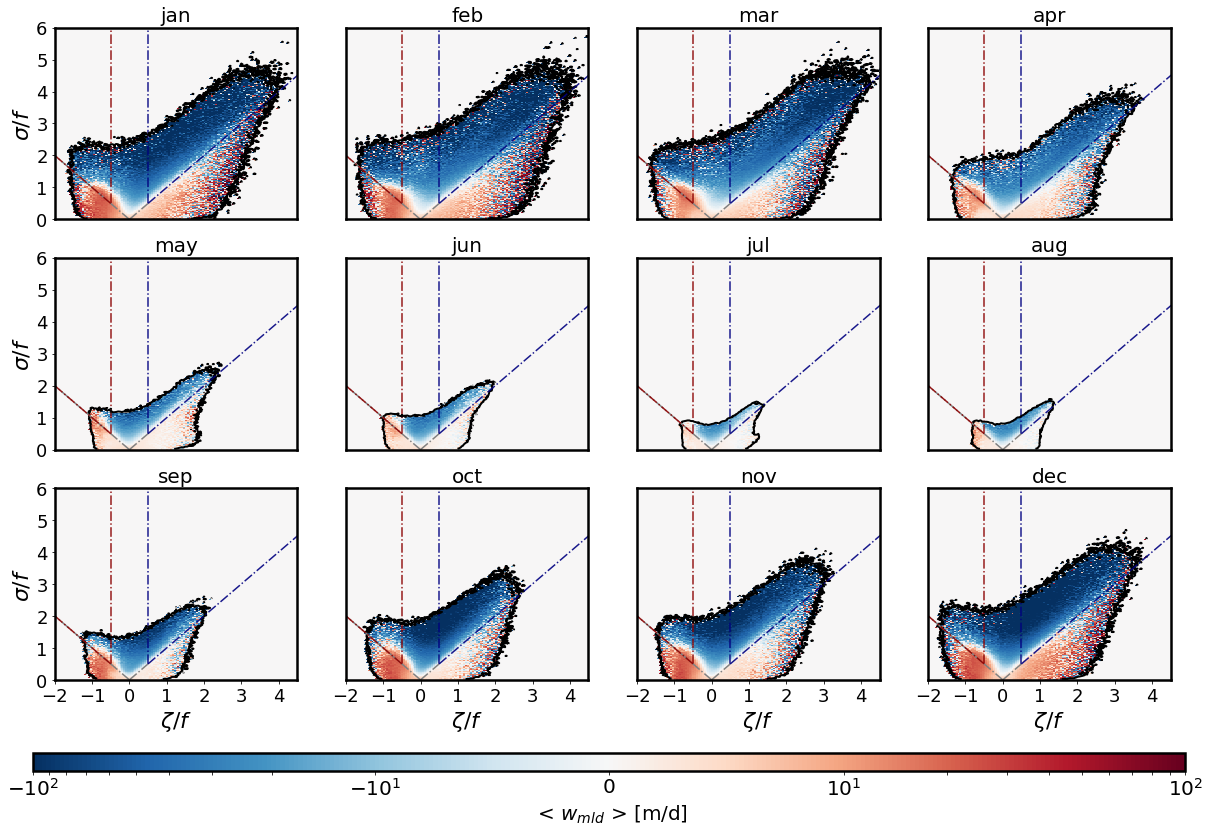

In [5]:
'''
TP 30/09/2023

Plot JPDF <w> at mld for each month 

'''

%matplotlib inline

from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy
from datetime import date, timedelta, datetime 
import netCDF4
import scipy.stats as st
import matplotlib as mpl
import matplotlib.colors as colors
import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt
import sys
from Tools_jpdf import*
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50


xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)
xx, yy = np.meshgrid(xedges[1:], yedges[1:])

list_month = ['jan','feb', 'mar', 'apr', 'may', 'jun','jul','aug','sep','oct','nov','dec']
#list_month = ['feb']
# TO EDIT 

dir_save = '/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_figures/'
#dir_save = 'figure/'

# JPDF data 

w_mld_front = []

fig = plt.figure(figsize=(20,12))
#plt.title(month,size=20)
plt.axis('off')

for i in range(len(list_month)):
    
    ax = fig.add_subplot(3,4,i+1)
    
    nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_filtred_domain/JPDF_{0}_mld.nc'.format(list_month[i]),'r')
    H_w = np.asfortranarray(nc.variables['H_w'])[:,:,:,:]
    H = np.asfortranarray(nc.variables['H_jpdf'])[:,:,:,:]
    gap_list = np.asfortranarray(nc.variables['gap_list'])[:]
    nc.close()
    
    H_sum = np.nansum(H[:,:,0,:],axis=2)
    #level,fmt = add_contour_per(H_sum,[99.99],c='k')
    level = level_month[i]
    H_w_sum = np.nanmean(H_w[:,:,:,:],axis=3)
    
    H_w_mld = H_w_sum[:,:,11]
    H_w_mld = np.where(H_sum < level,0,H_w_mld)
    
    plt.title(list_month[i],size=20)
    #ax.set_aspect('equal', 'box')
    cf = plt.pcolormesh(xedges[:],yedges[:],H_w_mld*3600*24,cmap=plt.cm.RdBu_r,norm=colors.SymLogNorm(linthresh=1e1, linscale=1,
                                                       vmin=-1e2, vmax=1e2))
    x = np.linspace(0, 6, 100)
    x = np.linspace(0, 6, 100)
    x1 = np.linspace(0, 0.5, 100)
    plt.plot(x1,x1,linestyle='-.',color='grey')
    plt.plot(-x,x,linestyle='-.',color='grey')
    plt.vlines(0.5,0.5,6,linestyle='-.',color='navy',alpha=0.9)
    x_sub = np.linspace(0.5, 6, 100)
    plt.plot(x_sub,x_sub,linestyle='-.',color='navy',alpha=0.9)

    plt.vlines(-0.5,0.5,6,linestyle='-.',color='darkred',alpha=0.9)
    x_sub = np.linspace(0.5, 6, 100)
    plt.plot(-x_sub,x_sub,linestyle='-.',color='darkred',alpha=0.9)


    CS = plt.contour(xedges[1:],yedges[1:],H_sum,level,linewidths=2,alpha=1,colors='k',linestyles='-')

    plt.xlim(-2,4.5)
    plt.ylim(0,6)
    
    
    if i == 0 or i ==4:
        plt.ylabel(r'$\sigma/f$',fontsize=22)
        plt.xticks([],fontsize=18)
        plt.yticks(fontsize=18)
        
    elif i == 8:
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.ylabel(r'$\sigma/f$',fontsize=22)
        plt.xlabel(r'$\zeta/f$',fontsize=22)
        
    elif i > 8:
        plt.xlabel(r'$\zeta/f$',fontsize=22)
        plt.xticks(fontsize=18)
        plt.yticks([], fontsize=18)
    
    else :
        plt.xticks([],fontsize=18)
        plt.yticks([],fontsize=18)
    
    #level = add_contour_per_wc(H_w_sum,list_proba,'k')
    
    #H_f = np.where(np.abs(xx) > 0.5, H_w_mld,0)
    #H_f = np.where(np.abs(yy) > np.abs(xx), H_f,0)
    
    H_f = np.where(xx > 0.5, H_w_mld,0)
    H_f = np.where(yy > xx, H_f,0)
    
    w_mld_front.append(np.nanmean(H_f))
    
cbaxes = fig.add_axes([0.11, 0.02, 0.8, 0.02]) 
cb = plt.colorbar(cf,ax = ax, cax = cbaxes,orientation="horizontal")  
cb.set_label(r' < $w_{mld}$ > [m/d]', fontsize=20)
cb.ax.tick_params(labelsize=20)

dir_save = '/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_figures/'
#plt.savefig(dir_save+'jpdf_wmean_season.pdf',dpi=50,bbox_inches='tight')

# Monthly JPDF wc

-1.93206787109375
0.32745361328125
-1.95831298828125
0.17974853515625
-2.07489013671875
-0.03082275390625
-2.01812744140625
0.27862548828125
-1.65496826171875
0.63018798828125
-1.58111572265625
0.64910888671875
-1.37298583984375
0.74188232421875
-1.61102294921875
0.61065673828125
-1.85394287109375
0.76507568359375
-1.97540283203125
0.42633056640625
-1.94427490234375
0.28594970703125
-1.99432373046875
0.17974853515625


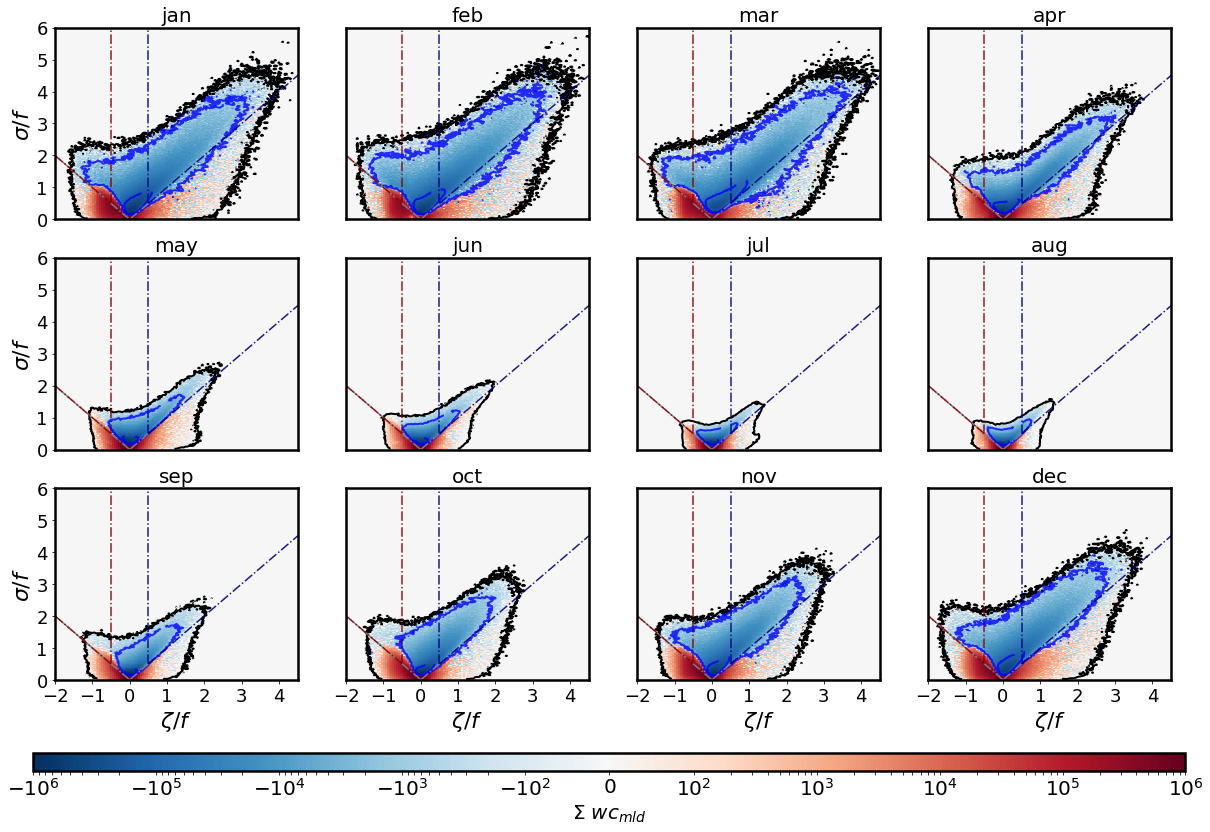

In [5]:
'''
TP 30/09/2023

Plot JPDF sum wc at mld for each month 

'''

%matplotlib inline

from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy
from datetime import date, timedelta, datetime 
import netCDF4
import scipy.stats as st
import matplotlib as mpl
import matplotlib.colors as colors
import netCDF4 as nc4
import numpy as np
import matplotlib.pyplot as plt
import sys
#from Tools_jpdf import*
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50


xedges = np.arange(-6,6.05,0.05)
yedges = np.arange(0,6.025,0.025)
xx, yy = np.meshgrid(xedges[1:], yedges[1:])

list_month = ['jan','feb', 'mar', 'apr', 'may', 'jun','jul','aug','sep','oct','nov','dec']
#list_month = ['feb']
# TO EDIT 

dir_save = '/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_figures/'
#dir_save = 'figure/'

# JPDF data 


list_proba_wc = [99,50]

fig = plt.figure(figsize=(20,12))
#plt.title(month,size=20)
plt.axis('off')

wc_mld_front = []

for i in range(len(list_month)):
    
    ax = fig.add_subplot(3,4,i+1)

    nc = nc4.Dataset('/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_filtred_domain/JPDF_{0}_mld.nc'.format(list_month[i]),'r')
    H_wc = np.asfortranarray(nc.variables['H_wc'])[:,:,:,:]
    H = np.asfortranarray(nc.variables['H_jpdf'])[:,:,:,:]
    gap_list = np.asfortranarray(nc.variables['gap_list'])[:]
    nc.close()
    
    H_sum = np.nansum(H[:,:,0,:],axis=2)
    level = level_month[i]
    CS = plt.contour(xedges[1:],yedges[1:],H_sum,level,linewidths=2,alpha=1,colors='k',linestyles='-')

    H_wc_sum = np.nansum(H_wc[:,:,:,:],axis=3)

    H_wc_mld = H_wc_sum[:,:,11]
    H_wc_mld = np.where(H_sum < level,0,H_wc_mld)
    
    plt.title(list_month[i],size=20)
    #ax.set_aspect('equal', 'box')
    cf = plt.pcolormesh(xedges[:],yedges[:],H_wc_mld*3600*24,cmap=plt.cm.RdBu_r,norm=colors.SymLogNorm(linthresh=1e2, linscale=1,
                                                       vmin=-1e6, vmax=1e6))
    x = np.linspace(0, 6, 100)
    x = np.linspace(0, 6, 100)
    x1 = np.linspace(0, 0.5, 100)
    plt.plot(x1,x1,linestyle='-.',color='grey')
    plt.plot(-x,x,linestyle='-.',color='grey')
    plt.vlines(0.5,0.5,6,linestyle='-.',color='navy',alpha=0.9)
    x_sub = np.linspace(0.5, 6, 100)
    plt.plot(x_sub,x_sub,linestyle='-.',color='navy',alpha=0.9)

    plt.vlines(-0.5,0.5,6,linestyle='-.',color='darkred',alpha=0.9)
    x_sub = np.linspace(0.5, 6, 100)
    plt.plot(-x_sub,x_sub,linestyle='-.',color='darkred',alpha=0.9)

    plt.xlim(-2,4.5)
    plt.ylim(0,6)
    
    
    if i == 0 or i ==4:
        plt.ylabel(r'$\sigma/f$',fontsize=22)
        plt.xticks([],fontsize=18)
        plt.yticks(fontsize=18)
        
    elif i == 8:
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.ylabel(r'$\sigma/f$',fontsize=22)
        plt.xlabel(r'$\zeta/f$',fontsize=22)
        
    elif i > 8:
        plt.xlabel(r'$\zeta/f$',fontsize=22)
        plt.xticks(fontsize=18)
        plt.yticks([], fontsize=18)
    
    else :
        plt.xticks([],fontsize=18)
        plt.yticks([],fontsize=18)
    
    level = add_contour_per_wc(H_wc_mld,list_proba_wc,'blue')
    
    H_f = np.where(np.abs(xx) > 0.5, H_wc_mld,0)
    H_f = np.where(np.abs(yy) > np.abs(xx), H_f,0)
    
    wc_mld_front.append(np.nansum(H_f))
    
cbaxes = fig.add_axes([0.11, 0.02, 0.8, 0.02]) 
cb = plt.colorbar(cf,ax = ax, cax = cbaxes,orientation="horizontal")  
cb.set_label(r'$\Sigma$ $wc_{mld}$ ', fontsize=20)
cb.ax.tick_params(labelsize=20)

dir_save = '/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/JPDF_figures/'
#plt.savefig(dir_save+'jpdf_wc_season.pdf',dpi=50,bbox_inches='tight')